In [378]:
import numpy as np
import matplotlib.pyplot as plt
import quandl as qdl
import pandas as pd

from sklearn import preprocessing, model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
# LOAD DATA

qdl.ApiConfig.api_key = ''
df = qdl.get('WIKI/NFLX', start_date='2017-01-01', end_date='2017-12-31')

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [ ]:
df.shape

In [379]:
df.to_csv('netflix.csv')

In [425]:
nflx = pd.read_csv('netflix.csv')

In [426]:
nflx.tail()

,Unnamed: 0,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prediction
215,215,194.46,194.49,190.81,193.90,5839579.0,189.94
216,216,191.61,192.59,189.50,192.02,6609739.0,187.76
217,217,191.12,196.05,191.00,195.08,4598005.0,186.24
218,218,193.64,195.88,193.00,195.71,3408535.0,192.71
219,219,194.54,195.42,191.53,192.12,4162712.0,191.96


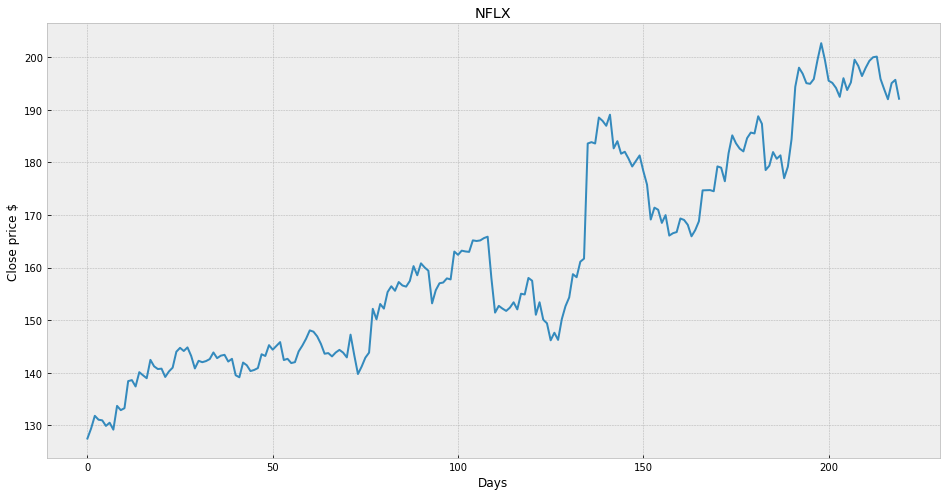

In [427]:
plt.style.use('bmh')
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close price $')
plt.title('NFLX')
plt.plot(nflx['Adj. Close'])
plt.show()

In [438]:
df = nflx[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [439]:
y = 'Adj. Close'

In [440]:
future = 30
df['prediction'] = df[y].shift(-future)
df.tail(45)

C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prediction
175,184.07,184.4995,182.5500,183.64,4303277.0,193.77
176,183.25,185.2882,182.0700,182.63,4469985.0,195.21
177,182.73,184.9300,181.4300,182.10,5442089.0,199.54
178,183.61,185.4500,182.7300,184.62,5318130.0,198.37
179,184.98,186.2300,184.1700,185.68,4951465.0,196.43
180,186.10,186.5000,183.2000,185.51,4473036.0,198.00
181,185.82,189.9500,184.5100,188.78,7113489.0,199.32
182,188.40,189.8500,186.3900,187.35,5420227.0,200.01
183,186.46,186.5500,177.7000,178.55,9322531.0,200.13
184,180.70,180.9500,176.5500,179.38,5572599.0,195.89


In [451]:
# DEAL WITH NAN
df.dropna(inplace=True)
df.tail()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prediction,HLP,DPC
185,181.01,183.34,180.70,181.97,4963152.0,193.90,-0.000053,0.000053
186,181.25,181.95,179.36,180.70,4064507.0,192.02,0.000030,-0.000030
187,180.73,182.90,180.65,181.35,4193999.0,195.08,-0.000034,0.000034
188,182.11,182.80,176.58,177.01,7316345.0,195.71,0.000288,-0.000280
189,177.65,179.70,177.55,179.19,3903112.0,192.12,-0.000086,0.000087


In [455]:
# High Low percentage change volality
df['HLP'] = (df['Adj. Open'] - df['Adj. Close']) / (df['Adj. Close'] )* 100
df['DPC'] = (df['Adj. Close'] - df['Adj. Open']) / (df['Adj. Open'] ) * 100 



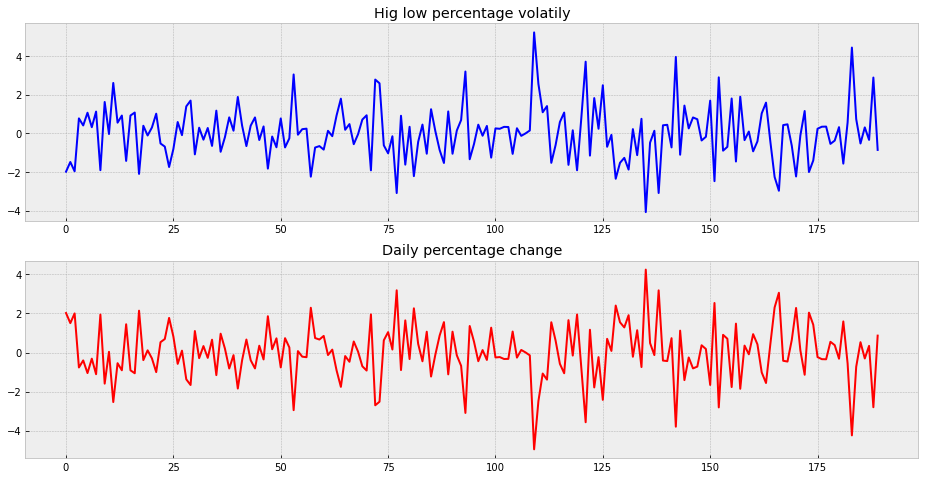

In [456]:
fig, ax = plt.subplots(2, figsize=(16, 8))
ax[0].plot(df['HLP'], c='b')
ax[0].set_title('Hig low percentage volatily')
ax[1].plot(df['DPC'], c='r')
ax[1].set_title('Daily percentage change')
plt.show()

In [469]:
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prediction,HLP,DPC
0,124.96,128.19,124.31,127.49,9437856.0,142.27,-1.984469,2.024648
1,127.49,130.17,126.55,129.41,7843559.0,142.01,-1.483657,1.506000
2,129.22,132.75,128.90,131.81,10185516.0,142.22,-1.964950,2.004334
3,132.08,133.88,129.81,131.07,10657878.0,142.60,0.770581,-0.764688
4,131.48,131.99,129.89,130.95,5771835.0,143.86,0.404735,-0.403103
...,...,...,...,...,...,...,...,...
185,181.01,183.34,180.70,181.97,4963152.0,193.90,-0.527559,0.530357
186,181.25,181.95,179.36,180.70,4064507.0,192.02,0.304372,-0.303448
187,180.73,182.90,180.65,181.35,4193999.0,195.08,-0.341880,0.343053
188,182.11,182.80,176.58,177.01,7316345.0,195.71,2.881193,-2.800505


In [470]:
# DESIGN (a.k a features) MATRIX and LABELS VECTOR
X = np.array(df.drop(['prediction', 'Adj. Close'], 1))
y = np.array(df['prediction'])

In [471]:
X.shape

(190, 6)

In [472]:
# SCALE
X = preprocessing.scale(X)

(190, 6)

In [473]:
# TEST
def test_size(a, b):
    print(f'X matrix shape: {a.shape}')
    print(f'y vector size: {b.shape}')
    if (len(a) == len(b)):
        print('we are good to go')
    else:
        print(f'lenght of X: {len(a)} \n')
        print(f'lenght of y: {len(b)}')
test_size(X, y)

X matrix shape: (190, 6)
y vector size: (190,)
we are good to go


In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [477]:
model = SGDRegressor()  #DecisionTreeRegressor()
model.fit(X_train, y_train)

LinearRegression()

In [478]:
# Return R² of the prediction.
accuracy = model.score(X_test, y_test)
accuracy
# Theta coefficients
coef  = model.coef_ 
# Interceptor
print(f'accuracy: {accuracy}')
print(f'coef: {coef}') 

accuracy: 0.671241848072496
coef: [ 57.92500887  45.51865203 -86.68547537  -3.34369874 -74.29146214
 -69.51004941]


In [480]:
x_future = df.drop(['Adj. Close','prediction'], 1)[:-future]

x_future = np.array(x_future.tail(future))
x_future = preprocessing.scale(x_future)
predict = model.predict(x_future)
predict

array([133.15912418, 130.46522883, 137.08847055, 142.42704286,
       145.66720226, 183.62683596, 174.06900908, 168.18839102,
       191.24177291, 175.46128702, 175.49402024, 168.59697814,
       229.90894672, 171.20039902, 181.05641191, 166.9447103 ,
       185.71353266, 169.36382165, 162.47000643, 170.17254888,
       178.15344445, 169.68994549, 181.85146607, 154.64547557,
       153.79970864, 158.16102765, 156.38261175, 161.35945805,
       146.54407051, 160.62771453])

In [481]:
# FORMAT DATA

valid = nflx[X.shape[0]:]
valid['predictions'] = predict
valid

C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prediction,predictions
190,190,181.41,186.7000,181.2500,184.45,9170855.0,195.51,133.159124
191,191,185.65,194.4900,184.4900,194.39,19270032.0,193.20,130.465229
192,192,194.30,198.9200,192.0500,198.02,15096222.0,194.10,137.088471
193,193,199.10,199.4000,196.5600,196.87,6912140.0,196.23,142.427043
194,194,197.85,198.3000,192.1000,195.08,6179012.0,196.32,145.667202
195,195,195.57,196.2199,193.8100,194.95,5544715.0,195.75,183.626836
196,196,196.75,198.6200,194.7100,195.86,7723224.0,195.05,174.069009
197,197,199.70,200.8199,197.1866,199.49,11929816.0,199.18,168.188391
198,198,201.95,202.8300,197.8600,202.68,18103086.0,188.15,191.241773
199,199,200.11,204.3800,197.7700,199.48,23819054.0,187.58,175.461287


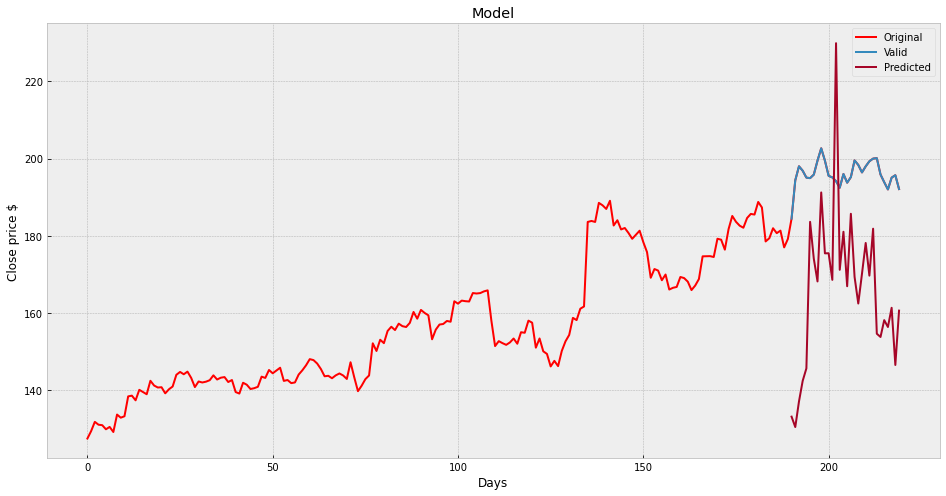

In [482]:
# VISUALIZE

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price $')
plt.plot(nflx['Adj. Close'], c='r')
plt.plot(valid[['Adj. Close', 'predictions']])
plt.legend(['Original', 'Valid', 'Predicted'])
plt.show()

In [408]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [483]:
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

model.fit(X, y)
score  = model.score(X_test, y_test)
y_pred = model.predict(x_future)
print(score)

0.7433592261070813


In [410]:
x_future

array([[1.677600e+02, 1.699300e+02, 1.670400e+02, 4.857816e+06],
       [1.683500e+02, 1.696400e+02, 1.667000e+02, 4.616656e+06],
       [1.698600e+02, 1.712363e+02, 1.661500e+02, 5.270931e+06],
       [1.685800e+02, 1.687500e+02, 1.655000e+02, 4.045626e+06],
       [1.664300e+02, 1.686700e+02, 1.656000e+02, 3.619575e+06],
       [1.650000e+02, 1.696800e+02, 1.647300e+02, 4.573282e+06],
       [1.695000e+02, 1.748500e+02, 1.693700e+02, 7.985196e+06],
       [1.754500e+02, 1.762400e+02, 1.738600e+02, 6.886143e+06],
       [1.755500e+02, 1.764800e+02, 1.739200e+02, 3.781453e+06],
       [1.734000e+02, 1.758800e+02, 1.724400e+02, 4.580903e+06],
       [1.752500e+02, 1.794600e+02, 1.737300e+02, 8.695383e+06],
       [1.788000e+02, 1.803500e+02, 1.771000e+02, 5.938152e+06],
       [1.784500e+02, 1.803900e+02, 1.762500e+02, 4.577777e+06],
       [1.781000e+02, 1.824700e+02, 1.780300e+02, 5.936476e+06],
       [1.825500e+02, 1.853300e+02, 1.806435e+02, 6.606688e+06],
       [1.840700e+02, 1.8

In [419]:
sorted(x_future[0,:])

[167.04, 167.76, 169.93, 4857816.0]

In [414]:
sorted(y_pred)

[176.03666635458146,
 178.4193776558702,
 179.54256195472547,
 179.57793610600314,
 180.9316804470166,
 181.39267396642438,
 181.44317454949154,
 185.10649408855878,
 186.03223999028918,
 186.67707393398084,
 187.3187864326761,
 187.5542998790801,
 187.56125519322816,
 187.7876503087575,
 188.19417636336058,
 188.32410459481034,
 189.0419735046785,
 189.77975686624714,
 189.79170737342022,
 190.4358170734462,
 190.79041779358099,
 191.05514841445947,
 191.63509656802356,
 191.84303268819897,
 193.1219219299866,
 193.84803728900013,
 194.7350261906938,
 195.20796656008085,
 195.22178633777898,
 198.72994665457165]

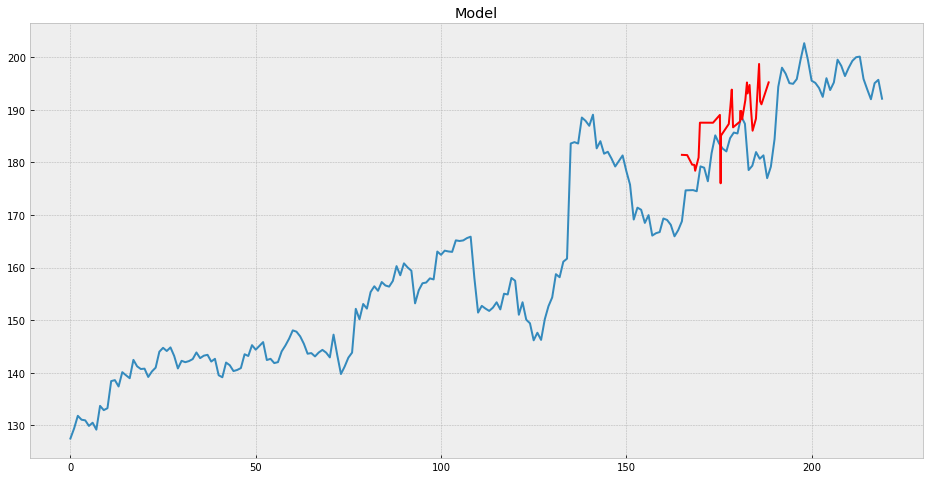

In [422]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.plot(nflx['Adj. Close'])


# MEMO NOT: do slice FIX  

plt.plot(sorted(x_future[-future:, 0]), y_pred[np.argsort(x_future[-future:, 0])], 'r')
plt.show()

In [355]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [367]:
def plot_lcs(model, X, Y, val_split=0.25, metrics=mean_squared_error):  
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=val_split) 
    # collections of errors:
    train_time_loss, test_time_loss = [], []   
    # iterating over train size:
    for train_size in range(1, len(x_train)):
        # training
        model.fit(x_train[:train_size], y_train[:train_size])
        
        # train and val predictions
        train_preds = model.predict(x_train[:train_size])
        test_preds = model.predict(x_test)
        
        # metrics calculation
        train_time_loss.append(metrics(y_train[:train_size], train_preds))
        test_time_loss.append(metrics(y_test, test_preds))
        
    # plotting curves
    plt.figure(figsize=(14, 6))
    plt.plot(np.sqrt(train_time_loss), 'r-*', label='Train loss')
    plt.plot(np.sqrt(test_time_loss), 'b-+', label='Test loss')
    plt.legend()
    plt.ylabel(f'{metrics.__name__}')
    plt.xlabel('Training Set Size')

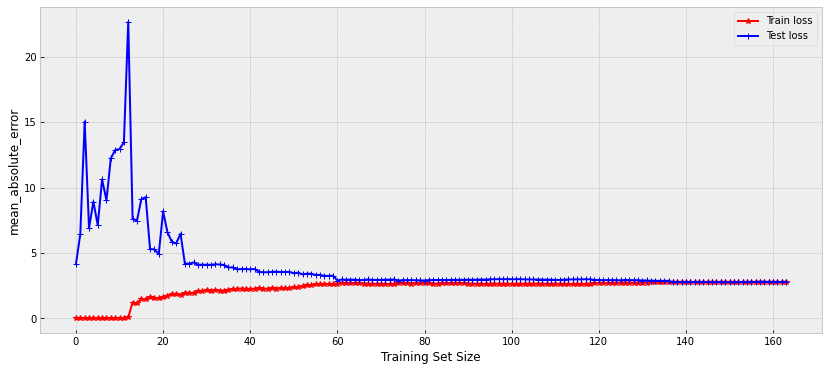

In [368]:
models = {
    'tree': Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])
#     'lnr' : Pipeline([
#     ('poly_features', PolynomialFeatures()),
#     ('regressor', LinearRegression())
# ]),
#     'sgd' : Pipeline([
#     ('poly_features', PolynomialFeatures()),
#     ('regressor', SGDRegressor())
# ])
}

metrics = mean_square_error
for key, model in models.items():
    plot_lcs(model, X, y, metrics=metrics)